In [100]:
from numpy import *
import matplotlib.pyplot as plt

### 训练算法 使用梯度上升找到最佳参数

In [101]:
# 使用 Logistic 回归在简单数据集上的分类

# 解析数据
def loadDataSet(file_name):
    '''
    Desc: 
        加载并解析数据
    Args:
        file_name -- 文件名称，要解析的文件所在磁盘位置
    Returns:
        dataMat -- 原始数据的特征
        labelMat -- 原始数据的标签，也就是每条样本对应的类别
    '''
    # dataMat为原始数据， labelMat为原始数据的标签
    dataMat = []; labelMat = []
    fr = open(file_name)
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [102]:
# sigmoid跳跃函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [103]:
# 正常的处理方案
# 两个参数：第一个参数==> dataMatIn 是一个2维NumPy数组，每列分别代表每个不同的特征，每行则代表每个训练样本。
# 第二个参数==> classLabels 是类别标签，它是一个 1*100 的行向量。为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给labelMat。
def gradAscent(dataMatIn, classLabels):
    '''
    Desc:
        正常的梯度上升法
    Args:
        dataMatIn -- 输入的 数据的特征 List
        classLabels -- 输入的数据的类别标签
    Returns:
        array(weights) -- 得到的最佳回归系数
    '''

    # 转化为矩阵[[1,1,2],[1,1,2]....]
    dataMatrix = mat(dataMatIn)             # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m,n = shape(dataMatrix)
    # print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
    # alpha代表向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        # m*3 的矩阵 * 3*1 的单位矩阵 ＝ m*1的矩阵
        # 那么乘上单位矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
        # print 'dataMatrix====', dataMatrix 
        # print 'weights====', weights
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)     # 矩阵乘法
        # print 'hhhhhhh====', h
        # labelMat是实际值
        error = (labelMat - h)              # 向量相减
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数
    return array(weights)

In [104]:
dataArr, labelMat = loadDataSet("testSet.txt")
dataArr = mat(dataArr)
#labelMat = mat(labelMat)


gradAscent(dataArr, labelMat)

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

### 分析数据：画出决策边界

In [105]:
# 可视化展示
def plotBestFit(weights):
    '''
        Desc:
            将我们得到的数据可视化展示出来
        Args:
            dataArr:样本数据的特征
            labelMat:样本数据的类别标签，即目标变量
            weights:回归系数
        Returns:
            None
    '''
    
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()


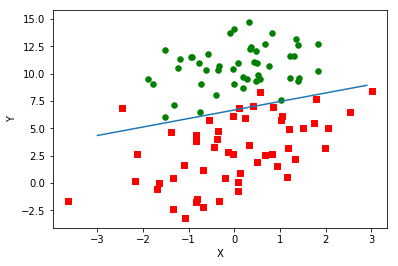

In [106]:
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights)

### 训练算法：随机梯度上升

In [107]:
# 随机梯度上升
# 梯度上升优化算法在每次更新数据集时都需要遍历整个数据集，计算复杂都较高
# 随机梯度上升一次只用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix, classLabels):
    '''
    Desc:
        随机梯度上升，只使用一个样本点来更新回归系数
    Args:
        dataMatrix -- 输入数据的数据特征（除去最后一列）
        classLabels -- 输入数据的类别标签（最后一列数据）
    Returns:
        weights -- 得到的最佳回归系数
    '''
    m,n = shape(dataMatrix)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = ones(n)   # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i]*weights))
        # print 'dataMatrix[i]===', dataMatrix[i]
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        # 0.01*(1*1)*(1*n)
     #   print (weights, "*"*10 , dataMatrix[i], "*"*10 , error)
        weights = weights + alpha * error * dataMatrix[i]
    return weights

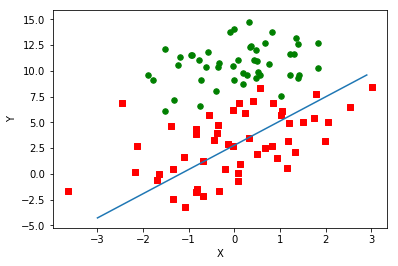

In [108]:
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

In [109]:
# 随机梯度上升算法（随机化）
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    '''
    Desc:
        改进版的随机梯度上升，使用随机的一个样本来更新回归系数
    Args:
        dataMatrix -- 输入数据的数据特征（除去最后一列数据）
        classLabels -- 输入数据的类别标签（最后一列数据）
        numIter=150 --  迭代次数
    Returns:
        weights -- 得到的最佳回归系数
    '''
    m,n = shape(dataMatrix)
    weights = ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001    # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(random.uniform(0,len(dataIndex)))
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            # print weights, '__h=%s' % h, '__'*20, alpha, '__'*20, error, '__'*20, dataMatrix[randIndex]
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

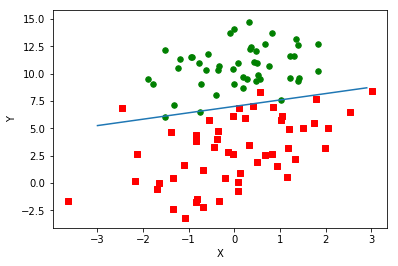

In [110]:
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

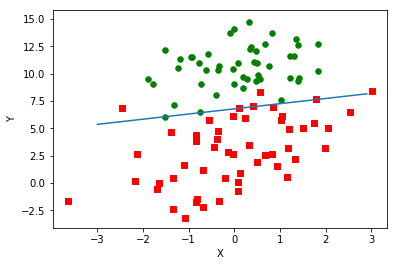

In [111]:
weights = stocGradAscent1(array(dataArr), labelMat, 500)
plotBestFit(weights)

# 示例 从疝气病症预测病马的死亡率

In [112]:
# 分类函数，根据回归系数和特征向量来计算 Sigmoid的值
def classifyVector(inX, weights):
    '''
    Desc: 
        最终的分类函数，根据回归系数和特征向量来计算 Sigmoid 的值，大于0.5函数返回1，否则返回0
    Args:
        inX -- 特征向量，features
        weights -- 根据梯度下降/随机梯度下降 计算得到的回归系数
    Returns:
        如果 prob 计算大于 0.5 函数返回 1
        否则返回 0
    '''
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [120]:
# 打开测试集和训练集,并对数据进行格式化处理
def colicTest():
    '''
    Desc:
        打开测试集和训练集，并对数据进行格式化处理
    Args:
        None
    Returns:
        errorRate -- 分类错误率
    '''
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    # 解析训练数据集中的数据特征和Labels
    # trainingSet 中存储训练数据集的特征，trainingLabels 存储训练数据集的样本对应的分类标签
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    # 使用 改进后的 随机梯度下降算法 求得在此数据集上的最佳回归系数 trainWeights
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    # 读取 测试数据集 进行测试，计算分类错误的样本条数和最终的错误率
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

In [121]:
# 调用 colicTest() 10次并求结果的平均值
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)) )

In [122]:
multiTest()

/Users/kyzhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is: 0.313433
the error rate of this test is: 0.298507
the error rate of this test is: 0.417910
the error rate of this test is: 0.373134
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
the error rate of this test is: 0.328358
the error rate of this test is: 0.343284
the error rate of this test is: 0.402985
the error rate of this test is: 0.373134
after 10 iterations the average error rate is: 0.340299
